In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from src.datasets import JetNetDataSets
from src.jetnet import JetNetFeatures
from torch.utils.data import DataLoader

def Bins(xmin, xmax, bins=100):
    dx = (xmax - xmin) / bins
    return np.arange(xmin, xmax, dx)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class DataConfig:

    jet_type : str = 'tops'

    sets : dict = {'fm_midpoint' : ('fm_tops150_mp200nfe.h5', 'etaphipt'),
                   'fm_euler'    : ('fm_tops150_eu200nfe.h5', 'etaphipt'),
                   'diff_ddim'   : ('ddim_200.h5', 'etaphipt_frac'),
                   'jetnet'      : ('t150.hdf5', 'particle_features')
                   }

    labels : dict = {'fm_midpoint' : 0,
                      'fm_euler' : 1,
                      'diff_ddim': 2,
                     'jetnet': 3
                      }

    preprocess: dict = {'normalize': {},
                        'logit_transform': {'alpha' : 1e-5},
                        'standardize': {'sigma' : 1.0}}
  
DataConfig = DataConfig 

In [11]:
data = JetNetDataLoader(dir_path='data/', 
                        data_files=DataConfig.sets,
                        data_class_labels=DataConfig.labels,
                        num_jets=2,
                        num_constituents=5, 
                        clip_neg_pt=True,
                        particle_features=['eta_rel', 'phi_rel', 'pt_rel', 'R', 'e_rel']
                        )

print(data.data_summary())

+-------------+---------------------+-----------+-------------------+------------------+-------------+
| Sample Name |      Filename       | Extension |        Key        |      Shape       | Class Label |
+-------------+---------------------+-----------+-------------------+------------------+-------------+
| fm_midpoint | fm_tops150_mp200nfe |    .h5    |     etaphipt      | (266920, 150, 3) |      0      |
|  fm_euler   | fm_tops150_eu200nfe |    .h5    |     etaphipt      | (266920, 150, 3) |      1      |
|   jetnet    |        t150         |   .hdf5   | particle_features | (177945, 150, 4) |      3      |
|  diff_ddim  |      ddim_200       |    .h5    |   etaphipt_frac   | (266920, 146, 3) |      2      |
+-------------+---------------------+-----------+-------------------+------------------+-------------+
None


In [12]:
data

In [7]:
data_loader = DataLoader(dataset=data, batch_size=2, shuffle=True)


In [8]:
for batch, labels in data_loader:
    print(batch[1])
    print(labels[1])
    break

tensor([[[-0.0845,  0.0709,  0.2532,  0.1104,  0.2541,  1.0000],
         [ 0.1324, -0.0320,  0.1720,  0.1362,  0.1735,  1.0000],
         [ 0.1333, -0.0426,  0.1124,  0.1399,  0.1134,  1.0000],
         [ 0.1287, -0.0470,  0.0941,  0.1370,  0.0948,  1.0000],
         [-0.0486,  0.1064,  0.0503,  0.1170,  0.0503,  1.0000]],

        [[-0.1582, -0.0762,  0.1292,  0.1756,  0.1308,  1.0000],
         [-0.1529, -0.0764,  0.1277,  0.1709,  0.1292,  1.0000],
         [ 0.1322, -0.0145,  0.0735,  0.1330,  0.0741,  1.0000],
         [ 0.1180,  0.1792,  0.0560,  0.2146,  0.0564,  1.0000],
         [ 0.1491, -0.0142,  0.0526,  0.1497,  0.0532,  1.0000]]])
tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.]]])


# Jet images

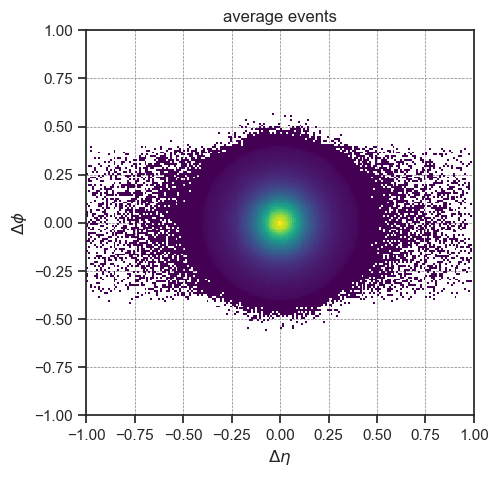

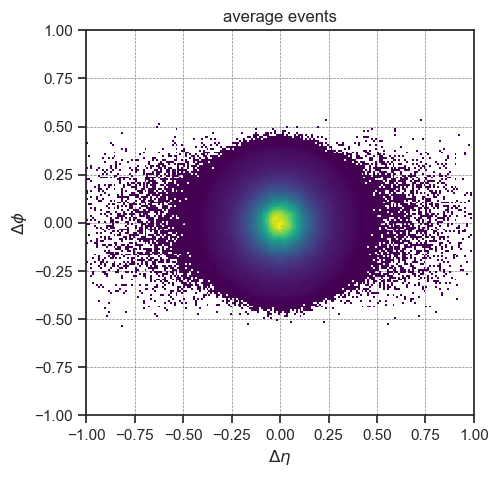

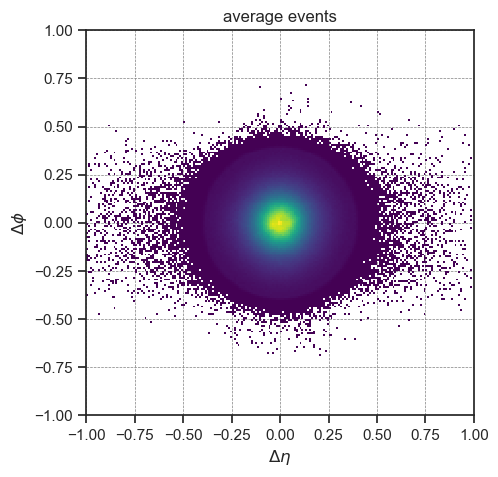

In [3]:
bins = (Bins(-1,1,200), Bins(-1,1,200))

jetnet.image(bins=bins) 
flowmatch.image(bins=bins)
diffusion.image(bins=bins)

# Check distribution of particle features

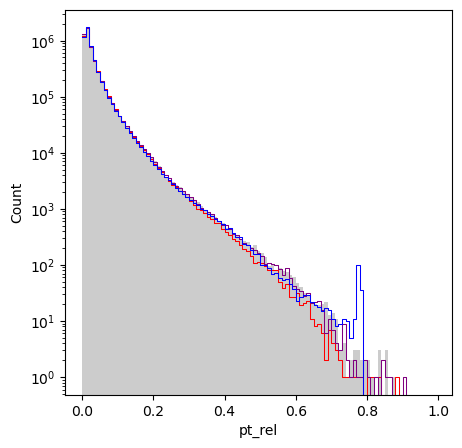

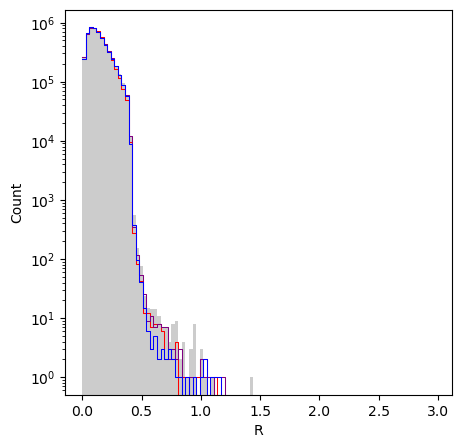

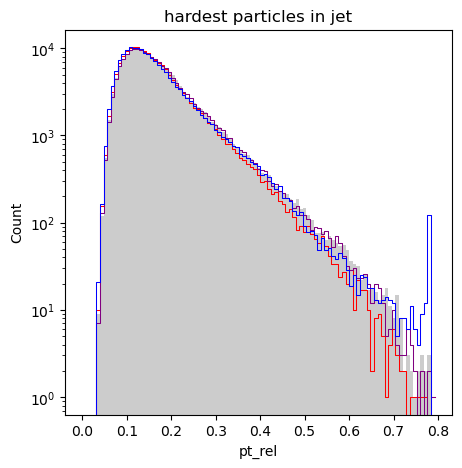

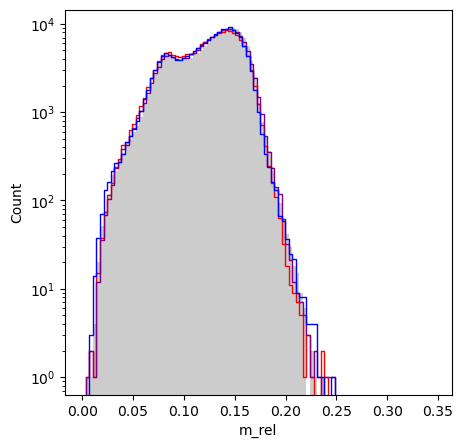

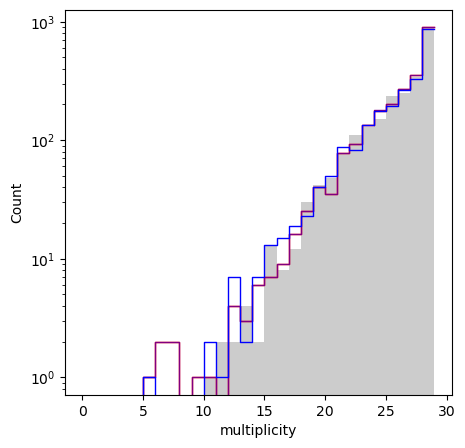

In [3]:

data = JetNetDataLoader(dir_path='data/', 
                        data_files=DataConfig.sets,
                        preprocess=None,
                        num_jets=175000,
                        num_constituents=30, 
                        clip_neg_pt=True,
                        particle_features=['eta_rel', 'phi_rel', 'pt_rel', 'R', 'e_rel']
                        )

jetnet = JetNetFeatures(data[2])
flowmatch_mp = JetNetFeatures(data[0])
flowmatch_eu = JetNetFeatures(data[1])
diffusion = JetNetFeatures(data[3])

bins = Bins(0,1)
fig, ax = plt.subplots(1, figsize=(5,5))
jetnet.particle_plot(feature='pt_rel', bins=bins, ax=ax) 
flowmatch_eu.particle_plot(feature='pt_rel', bins=bins,  fill=False, color='r', ax=ax) 
flowmatch_mp.particle_plot(feature='pt_rel', bins=bins,  fill=False, color='purple', ax=ax) 
diffusion.particle_plot(feature='pt_rel', bins=bins, fill=False, color='b', ax=ax) 

bins = Bins(0,3)
fig, ax = plt.subplots(1, figsize=(5,5))
jetnet.particle_plot(feature='R', bins=bins, ax=ax) 
flowmatch_eu.particle_plot(feature='R', bins=bins,  fill=False, color='r', ax=ax) 
flowmatch_mp.particle_plot(feature='R', bins=bins,  fill=False, color='purple', ax=ax) 
diffusion.particle_plot(feature='R', bins=bins, fill=False, color='b', ax=ax) 

bins = Bins(0,0.8)
fig, ax = plt.subplots(1, figsize=(5,5))
jetnet.particle_plot(feature='pt_rel', nth_particle=1, bins=bins, ax=ax) 
flowmatch_eu.particle_plot(feature='pt_rel', nth_particle=1, bins=bins,  fill=False, color='r', ax=ax) 
flowmatch_mp.particle_plot(feature='pt_rel', nth_particle=1,bins=bins,  fill=False, color='purple', ax=ax) 
diffusion.particle_plot(feature='pt_rel', nth_particle=1, bins=bins, fill=False, color='b', ax=ax) 
plt.title(r'hardest particles in jet')

bins = Bins(0,0.35)
fig, ax = plt.subplots(1, figsize=(5,5))
jetnet.jet_plot(feature='m_rel', bins=bins, ax=ax) 
flowmatch_eu.jet_plot(feature='m_rel', bins=bins,  fill=False, color='r', ax=ax) 
flowmatch_mp.jet_plot(feature='m_rel', bins=bins,  fill=False, color='purple', ax=ax) 
diffusion.jet_plot(feature='m_rel', bins=bins, fill=False, color='b', ax=ax) 

bins = range(30)
fig, ax = plt.subplots(1, figsize=(5,5))
jetnet.jet_plot(feature='multiplicity', bins=bins, ax=ax) 
flowmatch_eu.jet_plot(feature='multiplicity', bins=bins,  fill=False, color='r', ax=ax) 
flowmatch_mp.jet_plot(feature='multiplicity', bins=bins,  fill=False, color='purple', ax=ax) 
diffusion.jet_plot(feature='multiplicity', bins=bins, fill=False, color='b', ax=ax) 

# Preprocess data

INFO: preprocessing jetnet
	- normalizing data
	- applying logit transform alpha=1e-05
	- standardizing data to zero-mean and std=1.0
INFO: preprocessing fm_midpoint
	- normalizing data
	- applying logit transform alpha=1e-05
	- standardizing data to zero-mean and std=1.0
INFO: preprocessing fm_euler
	- normalizing data
	- applying logit transform alpha=1e-05
	- standardizing data to zero-mean and std=1.0
INFO: preprocessing diff_ddim
	- normalizing data
	- applying logit transform alpha=1e-05
	- standardizing data to zero-mean and std=1.0


Text(0.5, 1.0, 'hardest particles in jet')

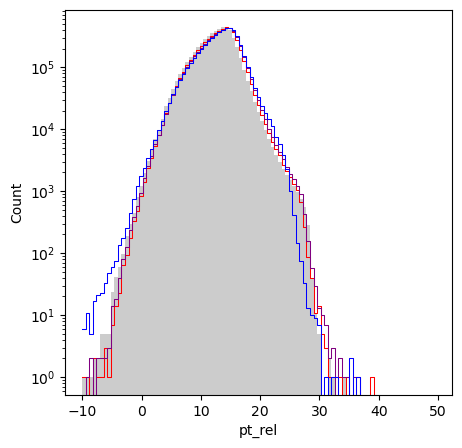

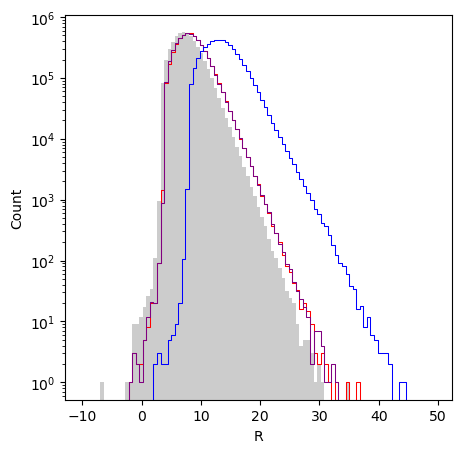

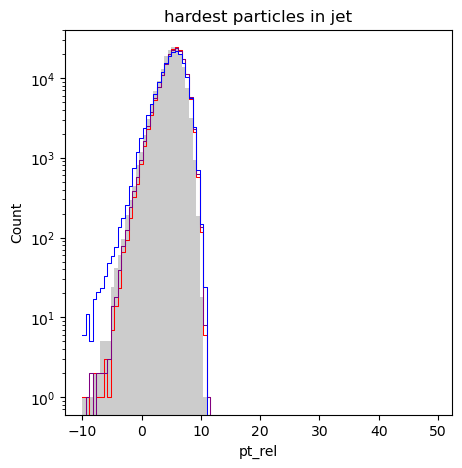

In [10]:
data = JetNetDataLoader(dir_path='data/',  data_files=DataConfig.sets, preprocess=DataConfig.preprocess, num_jets=175000, num_constituents=30,  clip_neg_pt=True, particle_features=['eta_rel', 'phi_rel', 'pt_rel', 'R', 'e_rel'])

jetnet = JetNetFeatures(data[2])
flowmatch_mp = JetNetFeatures(data[0])
flowmatch_eu = JetNetFeatures(data[1])
diffusion = JetNetFeatures(data[3])

bins = Bins(-10,50)
fig, ax = plt.subplots(1, figsize=(5,5))
jetnet.particle_plot(feature='pt_rel', bins=bins, ax=ax) 
flowmatch_eu.particle_plot(feature='pt_rel', bins=bins,  fill=False, color='r', ax=ax) 
flowmatch_mp.particle_plot(feature='pt_rel', bins=bins,  fill=False, color='purple', ax=ax) 
diffusion.particle_plot(feature='pt_rel', bins=bins, fill=False, color='b', ax=ax) 

fig, ax = plt.subplots(1, figsize=(5,5))
jetnet.particle_plot(feature='R', bins=bins, ax=ax) 
flowmatch_eu.particle_plot(feature='R', bins=bins,  fill=False, color='r', ax=ax) 
flowmatch_mp.particle_plot(feature='R', bins=bins,  fill=False, color='purple', ax=ax) 
diffusion.particle_plot(feature='R', bins=bins, fill=False, color='b', ax=ax) 

fig, ax = plt.subplots(1, figsize=(5,5))
jetnet.particle_plot(feature='pt_rel', nth_particle=1, bins=bins, ax=ax) 
flowmatch_eu.particle_plot(feature='pt_rel', nth_particle=1, bins=bins,  fill=False, color='r', ax=ax) 
flowmatch_mp.particle_plot(feature='pt_rel', nth_particle=1,bins=bins,  fill=False, color='purple', ax=ax) 
diffusion.particle_plot(feature='pt_rel', nth_particle=1, bins=bins, fill=False, color='b', ax=ax) 
plt.title(r'hardest particles in jet')
